<a href="https://colab.research.google.com/github/manu9418/IRH/blob/main/MAIRH_TF_HUyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidrograma Unitario

**Datos a ingresar:**

- Area (km2)  
- pp (mm)

- Hidrograma:  
    - tiempo en horas (t_h)
    - Caudal total (Qt_m3s)

## EJEMPLO 1
Determinar el HU para una cuenca de 600 [km^2] cuyo hidrograma observado se muestra en la figura; la precipitacion media de la cuenca P = 40 [mm] y la duracion de la lluvia D = 6 [horas]

## SOLUCIÓN 1
Para determinar las coordenadas del HU se sigue el siguiente procedimiento.

1. La separacion del caudal base fue hecha trazando un linea horizontal del inicio de la subida hasta el pico y luego una linea recta hasta el final del hidrograma. \\
2. Por diferencia entre el caudal total y caudal base se obtiene el caudal directo. \\
3. Calcular el volumen de escorrentia directa (VE [m^3] = caudal[m^3/s]*tiempo[s])
4. Calcular el volumen precipitado en la cuenca (VP [m^3] = precipitacion[m]*area[m^2] ) 
5. Calcular el coef. de escorrentia (C)
6. Calcular la altura efectiva (he)
7. Calcular las ordenadas del HU (Q_HU = Q_directo*(pp_10/he))
8. Finalmente se presenta el grafico del Hidrograma Unitario: HU(1cm, 6h)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 24})

In [ ]:
## ** Ingreso de datos manuales:  *****************************************

## 1. ingreso de tiempo
## a. Automatica
## paso de tiempo cada t unidades de tiempo
#t_step = 2;
## numero de tiempos registrados (filas)
#nt = 11;
#t_h = np.array([i*t_step for i in range(nt)])
## b. Manual
t_h = np.array([0,2,4,6,8,10,12,14,16,18,20])

## 2. ingreso de caudal total
Qt_m3s = np.array([25, 40, 75, 120, 200, 170,\
                   100, 65, 40, 30, 25])

## dataframe
df = pd.DataFrame(data= Qt_m3s, index= t_h, columns=['Q_total'])
df.index.name = 't_horas' # df.index.set_names('t_horas')

## ** Ingreso de datos desde csv: *****************************************

# df = pd.read_csv("/content/drive/MyDrive/Data/data_HU.csv", sep=";",\
#                 dtype={"t": int, "Q": np.float64},\
#                 index_col=0
#                 )
# df.columns = ['Q_total']
# df.index.name = 't_horas' 
## index_col=0,\
                
# si el ingreso de datos es manual comentar las lineas anteriores y 
# descomentar la parte correspondiente al ingreso de los valores manuales. 
# Aunque, en todo caso, se sugiere modificar el archivo data_HU.csv
df

,Q_total
t_horas,
0,25
2,40
4,75
6,120
8,200
10,170
12,100
14,65
16,40


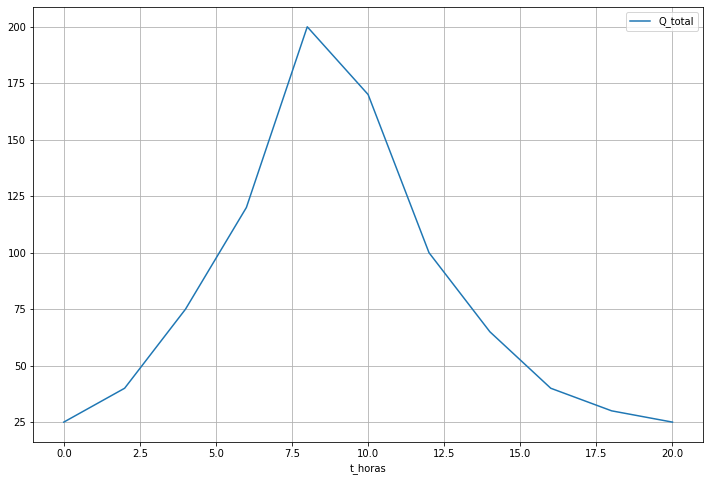

In [ ]:
#print(type(df.index[0]))
#print(type(df['Q_total'][0]))

## set tamanho de la figura
fig2 = plt.figure(figsize = (12,8))
ax2 = fig2.add_subplot(111)
df.plot(y='Q_total', ax=ax2,)
ax2.grid()
plt.show()

In [ ]:
# variables a modificar:
dt = 2              # ingresar valor en horas
A = 600*pow(10,6)   # ingresar valor en m2
P = 40              # ingresar valor en mm

## 1. Q_base : horizontal hasta el pico y 
##             despues una recta hasta el termino del hidrograma
argmax = df['Q_total'].argmax()
q0 = df['Q_total'].values[0]
q_base0 = [q0 for i in range(argmax+1)]
n_rest = df.shape[0] - len(q_base0)

qlast = df['Q_total'].values[-1]
q_baselast = np.linspace(q0 ,qlast, n_rest)
q_baselast = q_baselast.tolist()

df['Q_base'] = np.array(q_base0 + q_baselast)

## 2. Q_directo = Q_total - Q_base
df['Q_directo'] = df['Q_total'] - df['Q_base']

## 3. VE [m^3] : Volumen de escorrentia directa
#dt = float(input('ingrese el valor de dt = '))
VE = np.round(df['Q_directo'].sum(),1)*3600*dt
print('VE: ', VE)

## 4. VP [m^3] = P * A : Volumen de precipitacion
#A = float(input('ingrese el valor de A = '))
VP = (P*pow(10,-3))*A
print('VP: ', VP)

## 5. C = VE/VP : Coef. de escorrentia
C = VE/VP
C = np.round(C,2)
print('C: ', C)

## 6. he [m] = VE/A : Altura efectiva
he_m = VE/A
he_mm = np.round(he_m * pow(10,3),1)
print('he: ', he_mm)

## 7. Q_HU = Q_directo * val_HU : ordenadas del hidrograma unitario
val_HU = np.round(10/he_mm,2)
df['Q_HU'] = np.round(df['Q_directo'] * val_HU,1)
print('val_HU: ',val_HU)

df

VE:  4428000.0
VP:  24000000.0
C:  0.18
he:  7.4
val_HU:  1.35


,Q_total,Q_base,Q_directo,Q_HU
t_horas,,,,
0,25,25.0,0.0,0.0
2,40,25.0,15.0,20.2
4,75,25.0,50.0,67.5
6,120,25.0,95.0,128.2
8,200,25.0,175.0,236.3
10,170,25.0,145.0,195.8
12,100,25.0,75.0,101.2
14,65,25.0,40.0,54.0
16,40,25.0,15.0,20.2


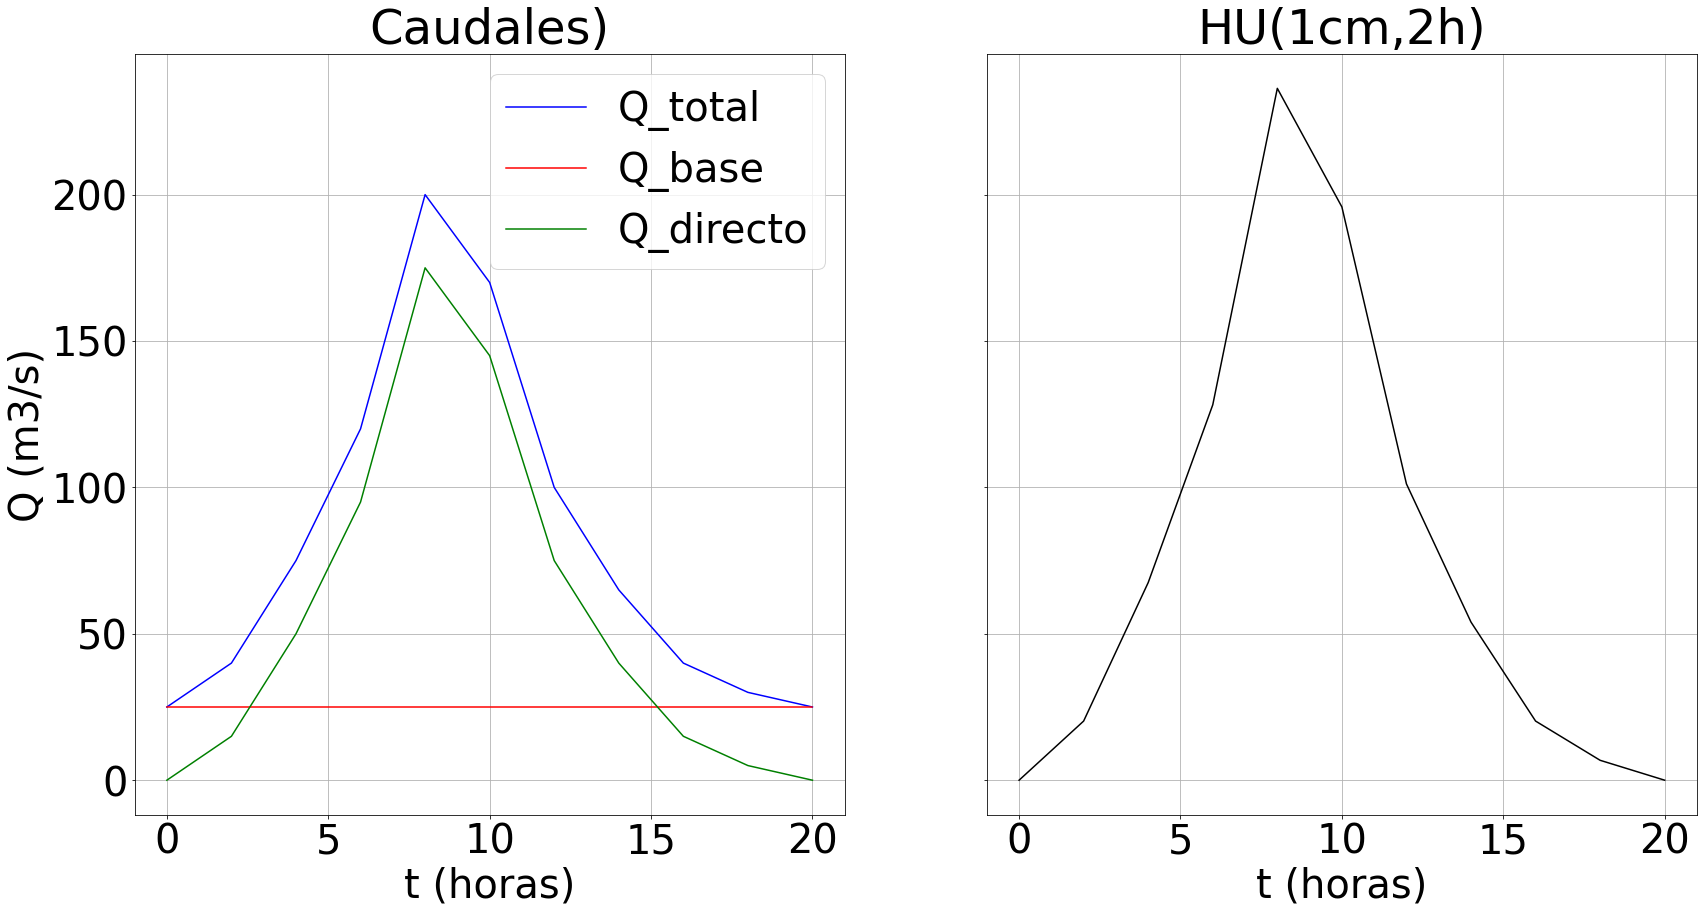

In [ ]:
## plot HU y caudales
plt.rcParams.update({'font.size': 40})
figs, axes = plt.subplots(1,2,sharey=True, **dict(figsize=(28,14)))
df['Q_total'].plot(color='b', ax=axes[0])
df['Q_base'].plot(color='r', ax=axes[0])
df['Q_directo'].plot(color='g', ax=axes[0])
df['Q_HU'].plot(color='black', ax=axes[1])

for axi in axes:
  axi.grid()
  #axi.legend(fontsize=24)
  axi.tick_params(axis='y')#, labelsize=20)
  axi.tick_params(axis='x')#, labelsize=18)

axes[0].set_title('Caudales)')#, fontsize=20)
axes[0].legend()
nom_HU = 'HU(1cm,'+str(dt)+'h)'
axes[1].set_title(nom_HU)#, fontsize=20) # verificar la duracion
axes[0].set_ylabel('Q (m3/s)')#, fontsize=20)
axes[0].set_xlabel('t (horas)')#, fontsize=20)
#axes[1].set_ylabel('Q (m3/s)')#, fontsize=20)
axes[1].set_xlabel('t (horas)')#, fontsize=20)
# plt.ticklabel_format?
plt.show()

# Teoría de Convolución

## EJEMPLO 2
Con el Hidrograma Unitario (HU) del ejemplo anterior, determinar el hidrograma de escorrentía para la siguiente lluvia efectiva distribuida como:  
De 0 a 2 horas (20 mm), de 2 a 4 horas (5 mm), de 4 a 6 horas (30 mm), de 6 a 8 horas (10 mm).

## SOLUCIÓN 2
El proceso de convolución aplicado y el
hidrograma resultante, se muestran en la Tabla y
figura siguiente.

Aplicación Práctica de la teoría de Convolución


In [ ]:
## SOLUCIÓN 2
## El proceso de convolución aplicado y el hidrograma resultante, 
## se muestran en la Tabla y figura siguiente.

# variables a modificar:
# dt = 2                                             # ingresar valor en horas
input_list_ini = [0,1,2,3]                           # ingresar valores de retraso
input_list_factors = [20/10, 5/10, 30/10, 10/10]     # ingresar factores 

if len(input_list_ini)==len(input_list_factors):
  print("todo correcto")
else:
  print("se deben ingresar valores del mismo tamanho")
  #break

def ord_df(data, t_ini, tmax_ini):
  ## funcion para ordenar los valores de entrada
  if t_ini==0:
    #print('t= ', t_ini)
    Q_HU_k_sorted = np.append(data, tmax_ini*[np.nan])
  elif (t_ini>0 & t_ini<tmax_ini):
    #print('t= ', t_ini)
    Q_HU_k_sorted = np.append(t_ini*[np.nan], data)
    Q_HU_k_sorted = np.append(Q_HU_k_sorted,(tmax_ini-t_ini)*[np.nan])
  return Q_HU_k_sorted

## tmax_5h
tmax_ini_now = np.asarray(input_list_ini).max() 
t_h = np.array([i*dt for i in range(df.shape[0]+tmax_ini_now)])

## Q_HU
Q_HU = ord_df(data = df['Q_HU'].values, t_ini=0, tmax_ini=tmax_ini_now)
df_now = pd.DataFrame(data= Q_HU, index= t_h, columns=['Q_HU'])

# t_xh
for i_ini in range(len(input_list_ini)):
  #print(i_ini, input_list_ini[i_ini])
  Q_HU_k = ((input_list_factors[i_ini]) * df['Q_HU'].values)
  name_col_i_ini = '('+ str(input_list_factors[i_ini]) +')*Q_HU'
  df_now[name_col_i_ini] = ord_df(data = Q_HU_k,\
                                t_ini=input_list_ini[i_ini],\
                                tmax_ini=tmax_ini_now)

df_now['Q_total'] = df_now[df_now.columns[1:]].sum(axis=1)
df_now

todo correcto


,Q_HU,(2.0)*Q_HU,(0.5)*Q_HU,(3.0)*Q_HU,(1.0)*Q_HU,Q_total
0,0.0,0.0,NaN,NaN,NaN,0.00
2,20.2,40.4,0.00,NaN,NaN,40.40
4,67.5,135.0,10.10,0.0,NaN,145.10
6,128.2,256.4,33.75,60.6,0.0,350.75
8,236.3,472.6,64.10,202.5,20.2,759.40
10,195.8,391.6,118.15,384.6,67.5,961.85
12,101.2,202.4,97.90,708.9,128.2,1137.40
14,54.0,108.0,50.60,587.4,236.3,982.30
16,20.2,40.4,27.00,303.6,195.8,566.80
18,6.8,13.6,10.10,162.0,101.2,286.90


Text(0.5, 1.0, 'Hidrograma resultante de la teoria de convolucion')

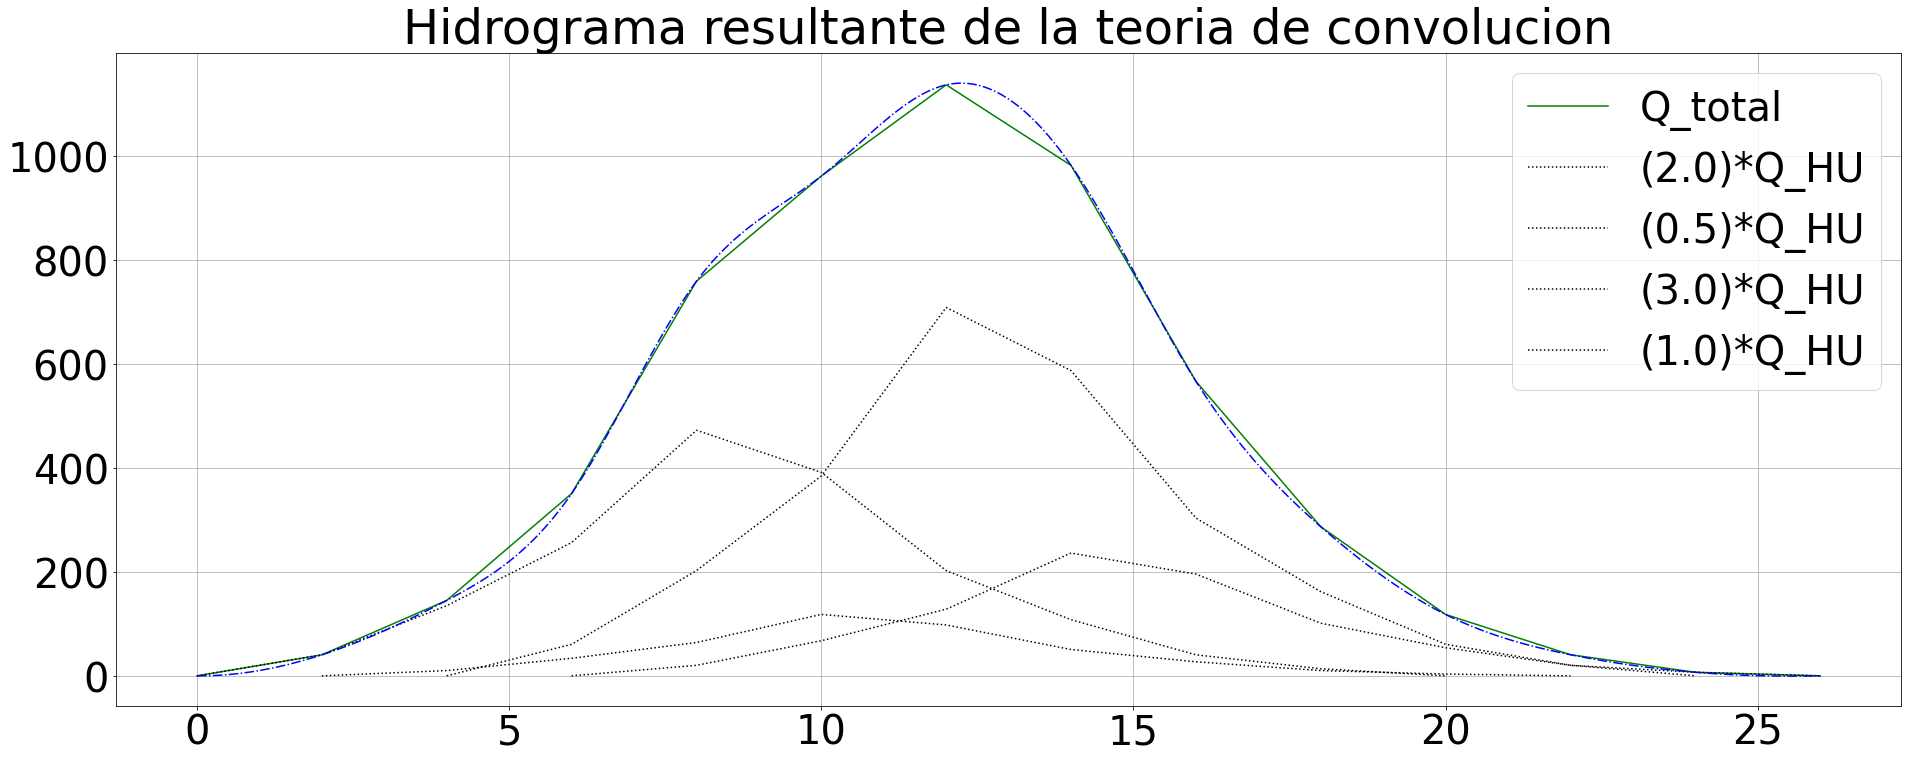

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

## 300 represents number of points to make between T.min and T.max
t_h_now = np.linspace(t_h.min(), t_h.max(), num=300)  

spl = make_interp_spline(t_h, df_now['Q_total'], k=3)  
# type: BSpline
Q_total_smooth = spl(t_h_now)

plt.rcParams.update({'font.size': 40})
fig3, ax3 = plt.subplots(1,1, **dict(figsize=(32,12)))
df_now['Q_total'].plot(color='g', ax=ax3)
for i_ini in range(len(input_list_ini)):
  name_col_i_ini = '('+ str(input_list_factors[i_ini]) +')*Q_HU'
  df_now[name_col_i_ini].plot(color='black', ls=':', ax=ax3)
# df_now['(35/10)*Q_HU'].plot(color='black', ls=':', ax=ax3)
# df_now['(5/10)*Q_HU'].plot(color='black', ls=':', ax=ax3)
# df_now['(40/10)*Q_HU'].plot(color='black', ls=':', ax=ax3)
plt.plot(t_h_now, Q_total_smooth, 'blue', linestyle='dashdot')

ax3.grid()
ax3.legend()#fontsize=26)
ax3.tick_params(axis='y')#, labelsize=20)
ax3.tick_params(axis='x')#, labelsize=18)

ax3.set_title('Hidrograma resultante de la teoria de convolucion')
#, fontsize=24)

# Curva S

## EJEMPLO 3

## SOLUCION 3

In [ ]:
## SOLUCION 3
# dt  = 2    # ingresar valor en horas
# dt2 = 6    # ingresar valor en horas
tlag = 2     # ingresar valor de tlag * dt = x horas de nueva duracion

#df['Q_HU'].values
matrix=np.zeros((df.shape[0],df.shape[0])) 

for j in range(df.shape[0]):
  for i in range(df.shape[0]):
    if j==0:
      matrix[i,j] = df['Q_HU'].values[i]
    else:
      if i+j>=df.shape[0]:
        continue
      matrix[i+j,j] = df['Q_HU'].values[i]

#matrix

t_h = np.array([i*dt for i in range(df.shape[0])]) #10+1
cols_S = [('Q_HU_'+str(i*dt)) for i in range(df.shape[0])] #10+1
df_S = pd.DataFrame(data= matrix, index=t_h, columns=cols_S)
df_S.index.name = 't_horas' # df.index.set_names('t_horas')
df_S['CURVA_S'] =  df_S[cols_S].sum(axis=1)
df_S

,Q_HU_0,Q_HU_2,Q_HU_4,Q_HU_6,Q_HU_8,Q_HU_10,Q_HU_12,Q_HU_14,Q_HU_16,Q_HU_18,Q_HU_20,CURVA_S
t_horas,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.2
4,67.5,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.7
6,128.2,67.5,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.9
8,236.3,128.2,67.5,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.2
10,195.8,236.3,128.2,67.5,20.2,0.0,0.0,0.0,0.0,0.0,0.0,648.0
12,101.2,195.8,236.3,128.2,67.5,20.2,0.0,0.0,0.0,0.0,0.0,749.2
14,54.0,101.2,195.8,236.3,128.2,67.5,20.2,0.0,0.0,0.0,0.0,803.2
16,20.2,54.0,101.2,195.8,236.3,128.2,67.5,20.2,0.0,0.0,0.0,823.4


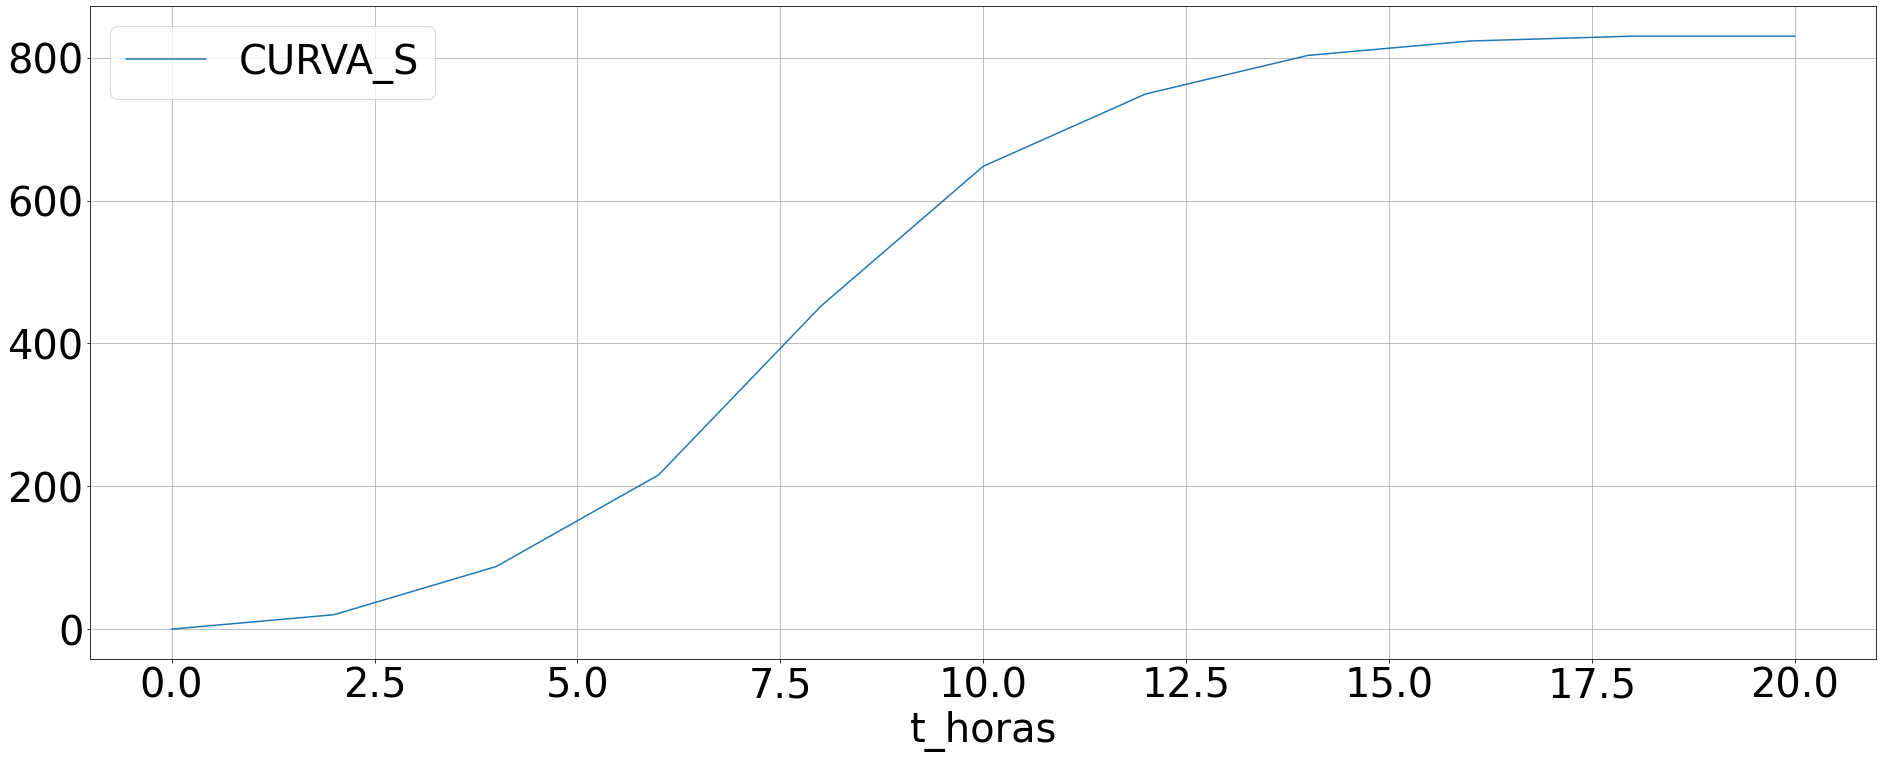

In [ ]:
plt.rcParams.update({'font.size': 40})
fig4, ax4 = plt.subplots(1,1, **dict(figsize=(32,12)))
df_S[['CURVA_S']].plot(ax = ax4)
plt.grid()
plt.show()

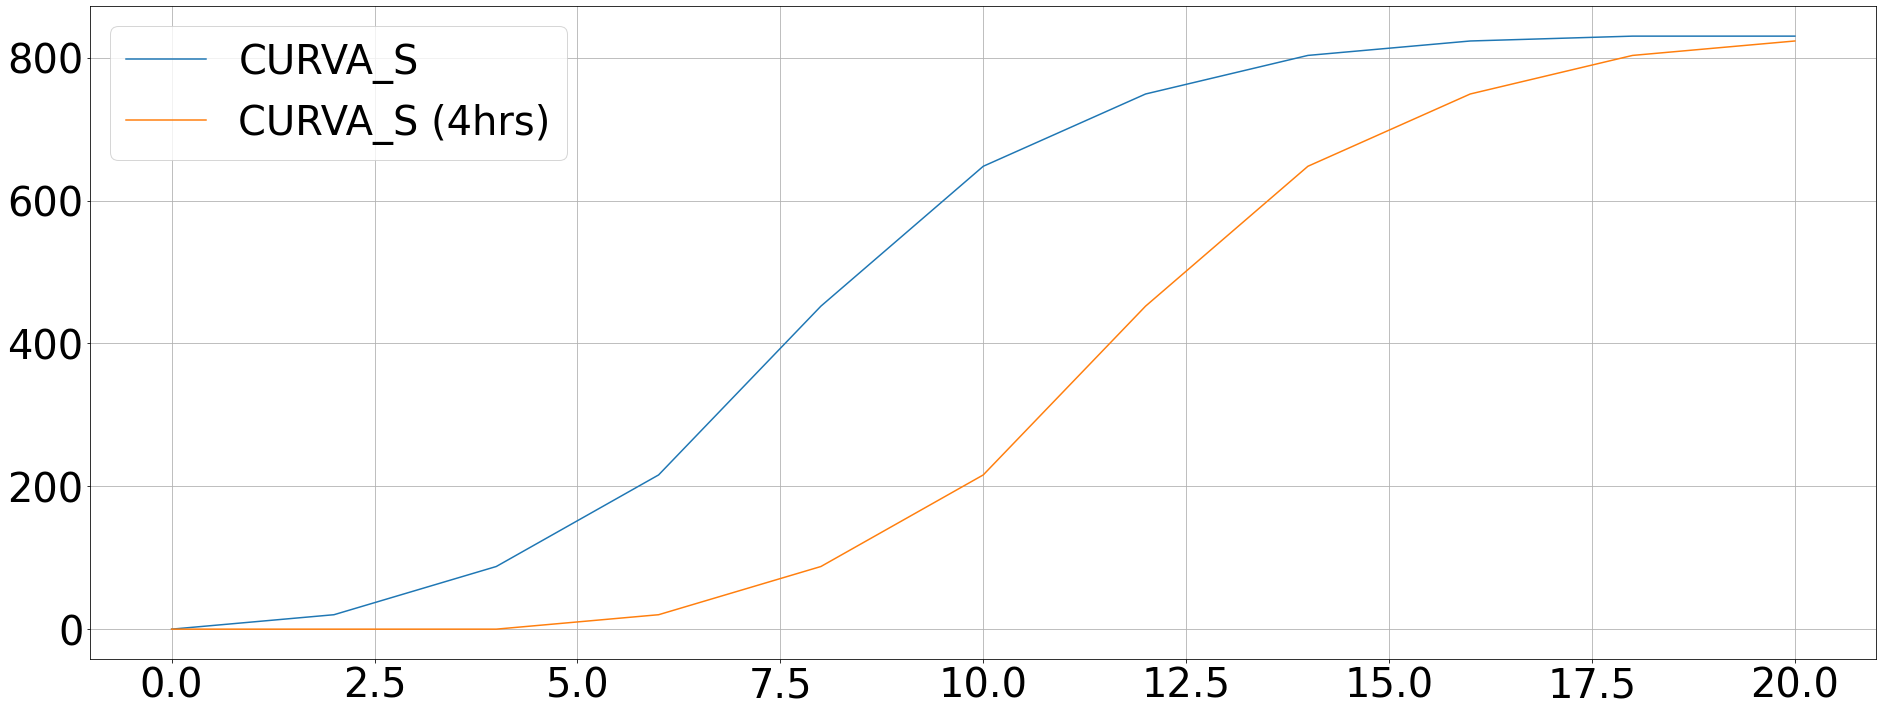

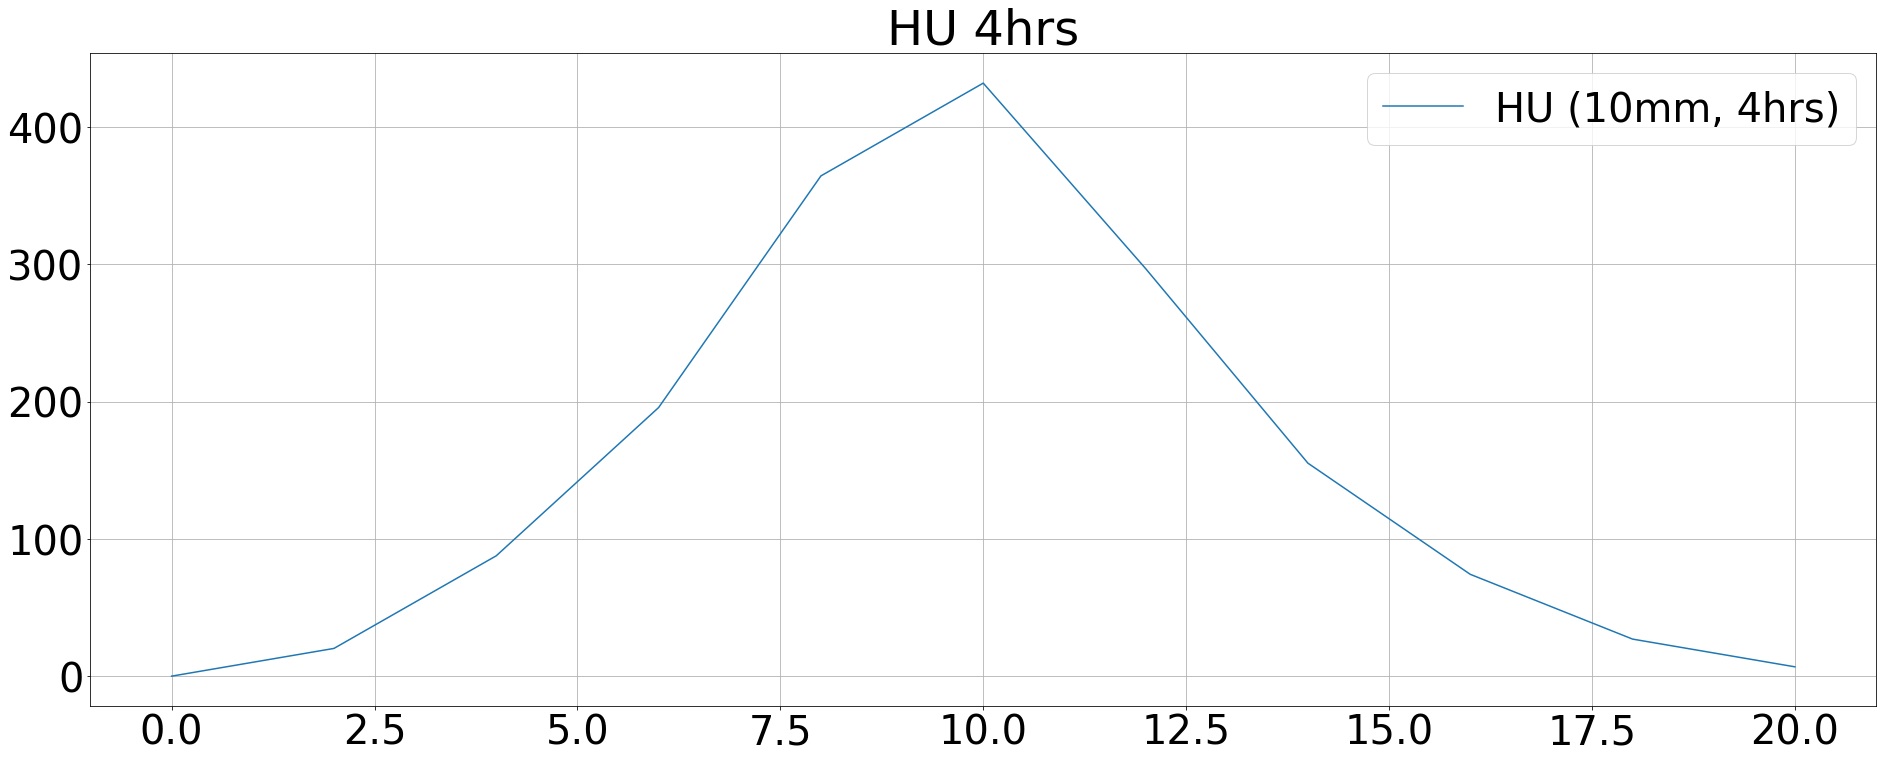

In [ ]:
t_h = np.array([i*dt for i in range(df.shape[0]+tlag)])
#t_h

# Q_HU
Q_HU = ord_df(data = df_S['CURVA_S'].values, t_ini=0,\
                tmax_ini=tlag)

df_lag = pd.DataFrame(data= Q_HU, index=t_h, columns=['CURVA_S'])

# Q_HU
Q_HU = ord_df(data = df_S['CURVA_S'].values, t_ini=tlag,\
              tmax_ini=tlag)

col_name_Slag = 'CURVA_S ('+str(tlag*dt)+'hrs)'
df_lag[col_name_Slag] = Q_HU

df_lag= df_lag.fillna(0)

# df_lag = pd.DataFrame(df_S['CURVA_S'])
col_name_HUlag = 'HU (10mm, '+str(tlag*dt)+'hrs)'
df_lag[col_name_HUlag] = df_lag[df_lag.columns[0]] - df_lag[df_lag.columns[1]]

df_lag= df_lag[:-tlag]
df_lag

plt.rcParams.update({'font.size': 40})
fig5, ax5 = plt.subplots(1,1, **dict(figsize=(32,12)))
df_lag[['CURVA_S', col_name_Slag]].plot(ax=ax5)
plt.grid()
plt.show()

#df_lag[df_lag.columns[-1]]

plt.rcParams.update({'font.size': 40})
fig6, ax6 = plt.subplots(1,1, **dict(figsize=(32,12)))
df_lag[df_lag.columns[-1]].plot(ax=ax6)
nom_UH_lag = 'HU '+str(tlag*dt)+'hrs'
plt.title(nom_UH_lag)
plt.legend()
plt.grid()
plt.show()
